In [1]:
library("rpart")
library("partykit")

Loading required package: grid


In [2]:
data = read.table("StatsFinal.csv", sep=',', header=T)

In [3]:
head(data)

,track_id,genre,key,duration,mode,tempo,loudness,year,artist_hotttnesss,artist_familiarity
1,TRAAAAK128F9318786,Pop_Rock,1,213.9424,1,99.944,-4.769,2009,0.461318337541,0.639902515496
2,TRAAAAV128F421A322,Pop_Rock,7,118.07302,1,125.475,-7.24,2005,0.386606364066,0.67175520534
3,TRAAAAW128F429D538,Rap,1,218.93179,0,92.198,-11.197,NA,0.401997543364,0.581793765845
4,TRAAABD128F429CF47,Pop_Rock,6,148.03546,0,121.274,-9.843,1969,0.417499644971,0.63063003759
5,TRAAACV128F423E09E,Pop_Rock,5,222.35383,1,100.812,-5.232,NA,0.33828981594,0.531334211069
6,TRAAADT12903CCC339,Easy_Listening,2,160.73098,1,97.623,-14.567,2003,0.336659560667,0.42179583845


In [4]:
# Missing Values in the whole Dataset
n = is.na(data)
table(n)

n
  FALSE    TRUE 
4073013  154127 

In [5]:
(154127/4073013)*100

[1] 3.784103

In [6]:
genre = table(data$genre)

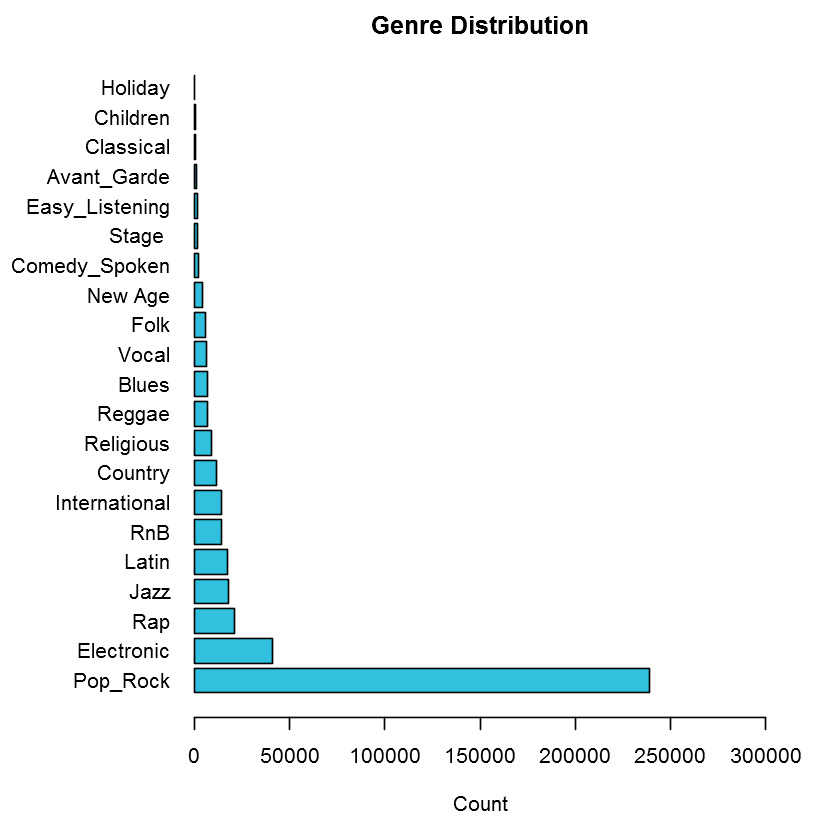

In [7]:
par(mar=c(5.1,8.1,2.1,3.1))
barplot(sort(genre, decreasing=T), las=1, xlab='Count', main="Genre Distribution", col=rgb(49/255,193/255,222/255),
        horiz=T, xlim=c(0, 300000))

In [8]:
key = table(data$key)
mode = table(data$mode)
tempo = table(data$tempo)
loudness = table(data$loudness)
year = table(data$year, useNA='no')

n
 FALSE 
422714 

[1] "Key Range =  0"  "Key Range =  11"


n
 FALSE 
422714 

[1] "Mode Range =  0" "Mode Range =  1"


n
 FALSE 
422714 

[1] "Tempo Range =  0"       "Tempo Range =  280.955"


n
 FALSE 
422714 

[1] "Loudness Range =  -57.871" "Loudness Range =  4.318"  


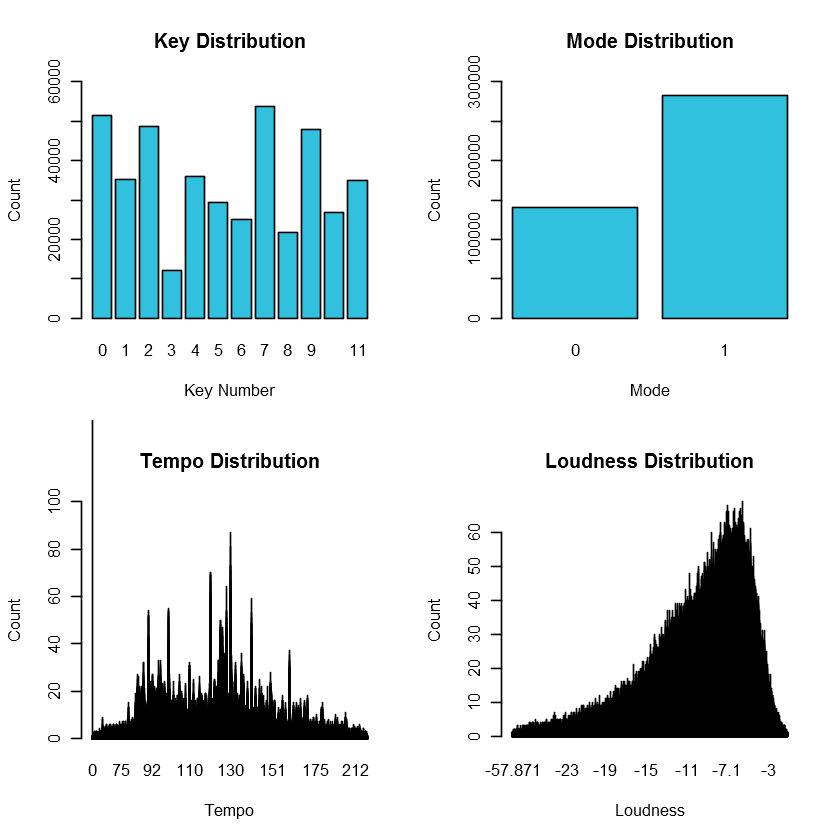

In [72]:
par(mfrow=c(2,2))
n = is.na(data$key)
table(n)
print(paste("Key Range = ", range(data$key, na.rm=T)))
barplot(key, ylim=c(0, 60000), main="Key Distribution", ylab='Count', xlab="Key Number",
        col=rgb(49/255,193/255,222/255))
n = is.na(data$mode)
table(n)
print(paste("Mode Range = ", range(data$mode, na.rm=T)))
barplot(mode, ylim=c(0, 300000), main='Mode Distribution', ylab='Count', xlab='Mode', , col=rgb(49/255,193/255,222/255))
n = is.na(data$tempo)
table(n)
print(paste("Tempo Range = ", range(data$tempo, na.rm=T)))
barplot(tempo, main='Tempo Distribution', xlab='Tempo', ylab="Count", ylim=c(0, 100), col=rgb(49/255,193/255,222/255))
n = is.na(data$loudness)
table(n)
print(paste("Loudness Range = ", range(data$loudness, na.rm=T)))
barplot(loudness, main="Loudness Distribution", xlab='Loudness', ylab='Count', col=rgb(49/255,193/255,222/255))

n
 FALSE   TRUE 
268610 154104 

[1] "Range =  1922" "Range =  2011"


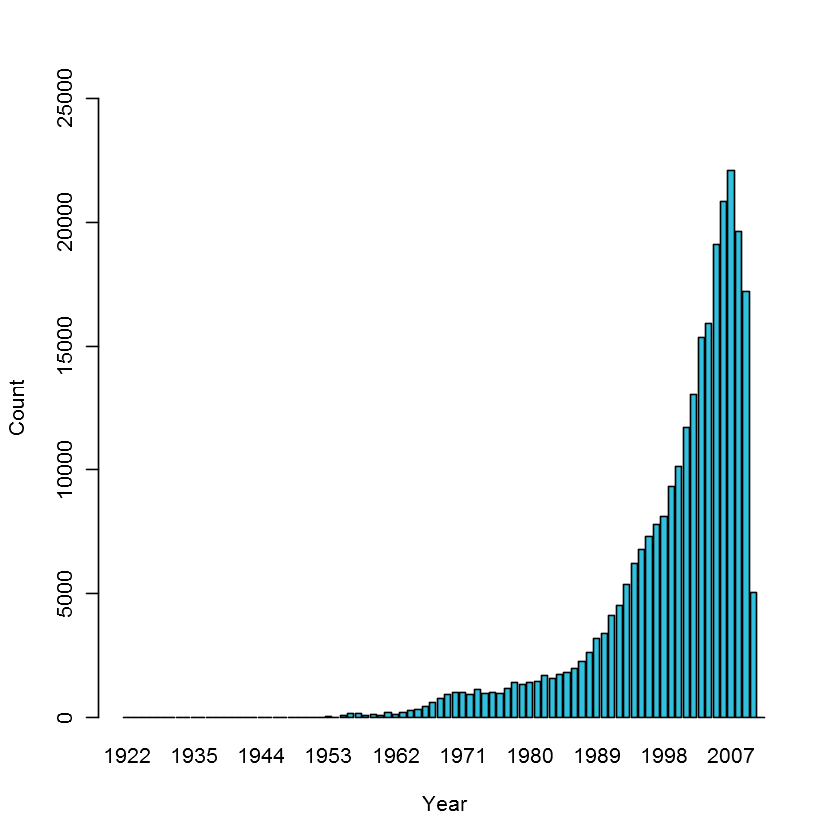

In [10]:
# Missing Values for Year
n = is.na(data$year)
table(n)
print(paste("Range = ", range(data$year, na.rm=T)))
barplot(year, ylim=c(0, 25000), ylab='Count', xlab='Year', col=rgb(49/255,193/255,222/255))

In [11]:
artist_hotness = table(data$artist_hotttnesss, useNA='no')
artist_fame = table(data$artist_familiarity, useNA='no')
duration = table(data$duration, useNA='no')

n
 FALSE 
422714 

[1] "artist hotness Range =  0"            
[2] "artist hotness Range =  1.08250255673"


n
 FALSE 
422714 

[1] "artist familiarity Range =  0" "artist familiarity Range =  1"


n
 FALSE 
422714 

[1] "Duration Range =  0.49587"    "Duration Range =  3034.90567"


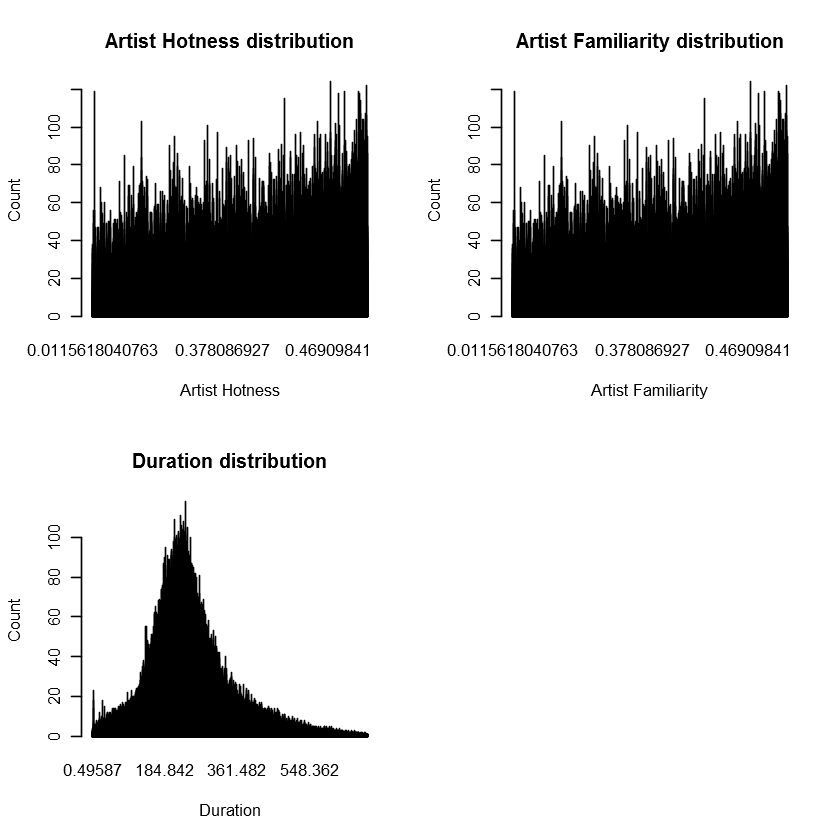

In [73]:
par(mfrow=c(2,2))
n= is.na(data$artist_hotttnesss)
table(n)
print(paste("artist hotness Range = ",range(data$artist_hotttnesss, na.rm=T)))
barplot(artist_hotness[-1], ylab='Count', xlab='Artist Hotness', main='Artist Hotness distribution',
       col=rgb(49/255,193/255,222/255))
n= is.na(data$artist_familiarity)
table(n)
print(paste("artist familiarity Range = ",range(data$artist_familiarity, na.rm=T)))
barplot(artist_hotness[-1], ylab='Count', xlab='Artist Familiarity', main='Artist Familiarity distribution',
       col=rgb(49/255,193/255,222/255))
n= is.na(data$duration)
table(n)
print(paste("Duration Range = ",range(data$duration, na.rm=T)))
barplot(duration, ylab='Count', xlab='Duration', main='Duration distribution',col=rgb(49/255,193/255,222/255))

## The variable 'Year' has maximum missing values so it is I removed that variable from consideration.
## The relatively less missing values in 'artist_hotness' and 'artist_familiarity' were filled in with the mean of those variables. to get the complete data

In [13]:
print(names(data))
data = data[,-c(1,8)]

 [1] "track_id"           "genre"              "key"               
 [4] "duration"           "mode"               "tempo"             
 [7] "loudness"           "year"               "artist_hotttnesss" 
[10] "artist_familiarity"


In [14]:
names(data)

[1] "genre"              "key"                "duration"          
[4] "mode"               "tempo"              "loudness"          
[7] "artist_hotttnesss"  "artist_familiarity"

In [15]:
data[is.na(data$artist_hotttnesss), 'artist_hotttnesss'] = median(data$artist_hotttnesss, na.rm=T)
data[is.na(data$artist_familiarity), 'artist_familiarity'] = median(data$artist_familiarity, na.rm=T)

In [16]:
# Missing Values in artist_hotttnesss after replacing missing data
table(is.na(data))


  FALSE 
3381712 

In [17]:
# Missing Values in artist_familiarity after replacing missing data
table(is.na(data$artist_familiarity))


 FALSE 
422714 

In [18]:
g = as.data.frame(genre)
g = data.frame(genre = g$Var1, ratio = round(g$Freq/nrow(data),6), percent = round((g$Freq/nrow(data))*100,2), 
               count = as.data.frame(genre)$Freq)
g

,genre,ratio,percent,count
1,Avant_Garde,0.002399,0.24,1014
2,Blues,0.016172,1.62,6836
3,Children,0.001128,0.11,477
4,Classical,0.001315,0.13,556
5,Comedy_Spoken,0.00489,0.49,2067
6,Country,0.027849,2.78,11772
7,Easy_Listening,0.003655,0.37,1545
8,Electronic,0.09717,9.72,41075
9,Folk,0.013875,1.39,5865
10,Holiday,0.000473,0.05,200


In [19]:
lessFrequent = subset(g, g$count <= 10000)
tot = sum(lessFrequent$count)
lessFrequent$ratio = round(lessFrequent$count/tot,4)
lessFrequent$percent = lessFrequent$ratio*100
lessFrequent

,genre,ratio,percent,count
1,Avant_Garde,0.022,2.2,1014
2,Blues,0.1482,14.82,6836
3,Children,0.0103,1.03,477
4,Classical,0.0121,1.21,556
5,Comedy_Spoken,0.0448,4.48,2067
7,Easy_Listening,0.0335,3.35,1545
9,Folk,0.1271,12.71,5865
10,Holiday,0.0043,0.43,200
14,New Age,0.0869,8.69,4010
17,Reggae,0.1505,15.05,6946


In [20]:
frequent = subset(g, g$count > 1000)
tot = sum(frequent$count)
frequent$ratio = round(frequent$count/tot,4)
frequent$percent = frequent$ratio*100
frequent

,genre,ratio,percent,count
1,Avant_Garde,0.0024,0.24,1014
2,Blues,0.0162,1.62,6836
5,Comedy_Spoken,0.0049,0.49,2067
6,Country,0.0279,2.79,11772
7,Easy_Listening,0.0037,0.37,1545
8,Electronic,0.0975,9.75,41075
9,Folk,0.0139,1.39,5865
11,International,0.0338,3.38,14242
12,Jazz,0.0423,4.23,17836
13,Latin,0.0417,4.17,17590


In [21]:
frequentData = subset(data, !(genre %in% lessFrequent$genre), drop=T)
lessFrequentData = subset(data, (genre %in% lessFrequent$genre), drop=T)

In [22]:
nrow(frequentData)
nrow(lessFrequentData)

[1] 376575

[1] 46139

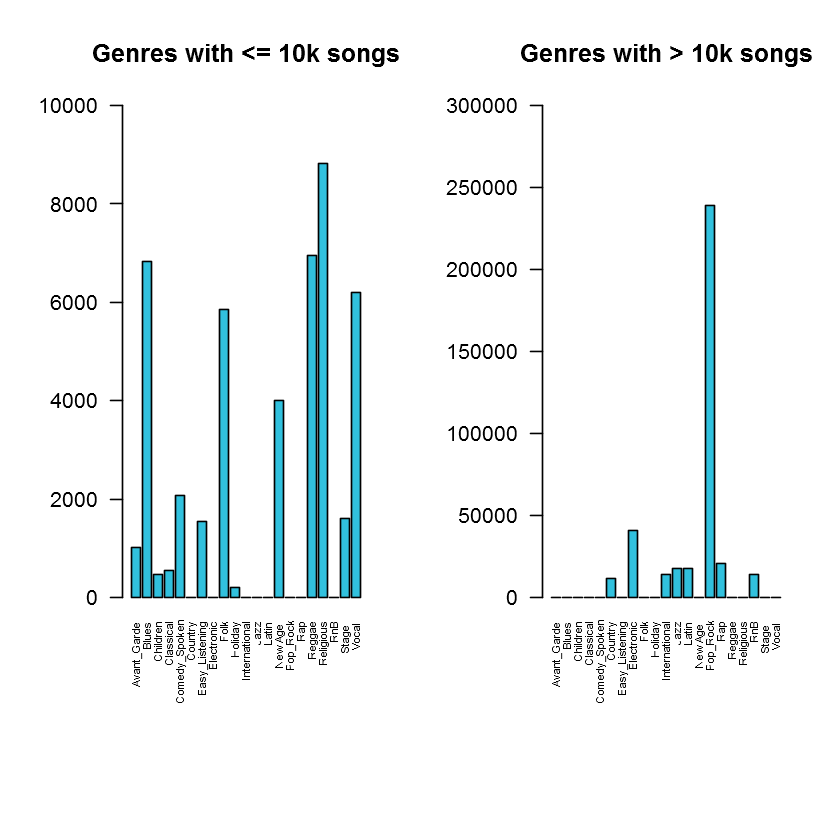

In [23]:
par(mfrow=c(1,2),mar=c(10.1, 5.1,4.4,2.1))
barplot(table(lessFrequentData$genre), las=2, col=rgb(49/255,193/255,222/255), main="Genres with <= 10k songs",
       ylim=c(0, 10000), cex.names=0.5)
barplot(table(frequentData$genre), las=2, col=rgb(49/255,193/255,222/255), main="Genres with > 10k songs",
       ylim=c(0, 300000), cex.names=0.5)

In [24]:
lessFrequentData = subset(lessFrequentData, !( genre %in% c('Children', 'Classical', 'Holiday')))

In [25]:
idx = sample(1:nrow(lessFrequentData), size=nrow(lessFrequentData), replace=F)
thresh = ceiling(nrow(lessFrequentData)*.8)
train_tree = lessFrequentData[idx[1:thresh],]
test_tree = lessFrequentData[idx[thresh+1:nrow(lessFrequentData)],]
nrow(lessFrequentData)

[1] 44906

In [26]:
lf_tree = rpart(genre ~ . , data=train_tree, method='class')

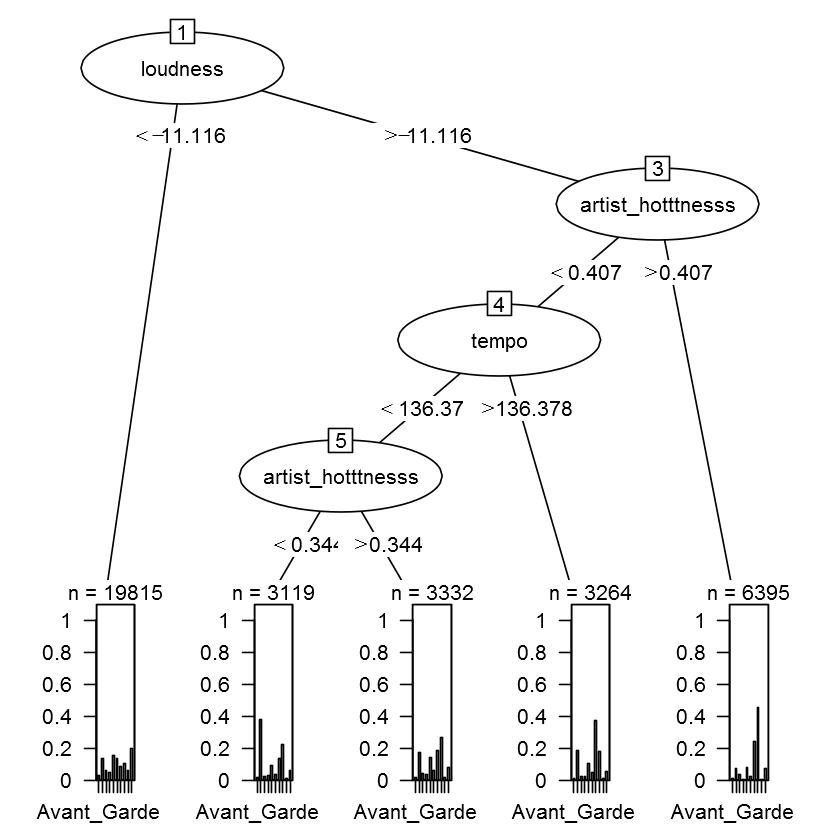

In [27]:
plot(as.party(lf_tree), tp_args = list(id=F))

In [28]:
tt = table(actual=train_tree$genre, predicted=predict(lf_tree, newdata=train_tree, type='class'))
print(1 - sum(diag(tt))/sum(tt))
tt = table(test_tree$genre, predict(lf_tree, newdata=test_tree, type='class'))
print(1 - sum(diag(tt))/sum(tt))

[1] 0.7187752
[1] 0.7248636


In [29]:
printcp(lf_tree)


Classification tree:
rpart(formula = genre ~ ., data = train_tree, method = "class")

Variables actually used in tree construction:
[1] artist_hotttnesss loudness          tempo            

Root node error: 28825/35925 = 0.80237

n= 35925 

        CP nsplit rel error  xerror      xstd
1 0.065291      0   1.00000 1.00000 0.0026185
2 0.013981      1   0.93471 0.93540 0.0028452
3 0.010928      3   0.90675 0.91337 0.0029094
4 0.010000      4   0.89582 0.89880 0.0029486


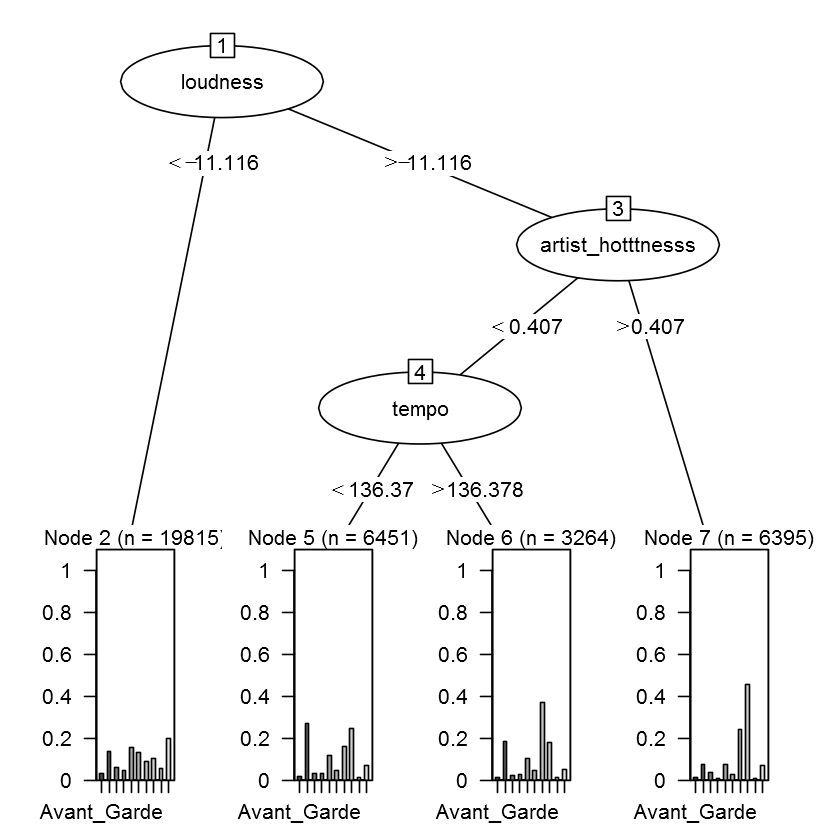

In [30]:
lf_prune = prune(lf_tree, cp=0.013742 )
plot(as.party(lf_prune))

In [31]:
tt = table(actual=train_tree$genre, predicted=predict(lf_prune, newdata=train_tree, type='class'))
print(1 - sum(diag(tt))/sum(tt))
tt = table(test_tree$genre, predict(lf_prune, newdata=test_tree, type='class'))
print(1 - sum(diag(tt))/sum(tt))

[1] 0.7275435
[1] 0.7337713


In [32]:
count = matrix(nrow=13, ncol=1)
for (i in seq(1:13))
    count[i] = nrow( frequentData[frequentData$genre == frequent$genre[i],])
count = sort(count, decreasing=T)

In [33]:
not_pr = frequentData[frequentData$genre != 'Pop_Rock',]
not_pr =  not_pr[not_pr$genre != 'Electronic',]

In [34]:
pr_rows = sample(nrow(frequentData), nrow(frequentData), replace=F)

In [35]:
pr_subset = data.frame()
el_subset = data.frame()
for (i in pr_rows){
    if(nrow(pr_subset) == count[3] && nrow(el_subset) == count[3])
        break
    else if(frequentData[i,1] == 'Pop_Rock' && nrow(pr_subset) <= count[3])
        pr_subset = rbind(pr_subset, frequentData[i,])
    else if (frequentData[i,1] == 'Electronic' && nrow(el_subset) <= count[3])
        el_subset = rbind(el_subset, frequentData[i,])
}

In [36]:
pr_subset = rbind(pr_subset, el_subset)
balanced = rbind(not_pr, pr_subset)
rm(pr_subset, el_subset)

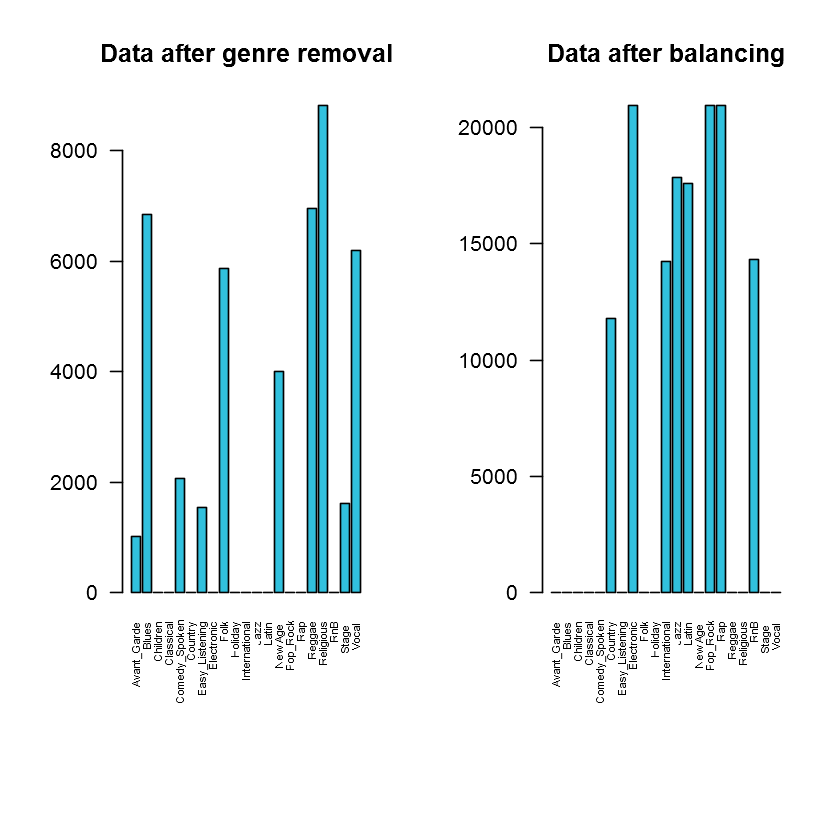

In [37]:
par(mar=c(10.1, 5.1,4.4,2.1), mfrow=c(1,2))
barplot(table(lessFrequentData$genre), las=2, col=rgb(49/255,193/255,222/255), main='Data after genre removal',cex.names=0.5)
barplot(table(balanced$genre), las=2, col=rgb(49/255,193/255,222/255), main='Data after balancing', cex.names=0.5)

In [63]:
idx = sample(1:nrow(balanced), size=nrow(balanced), replace=F)
thresh = ceiling(nrow(balanced)*.8)
train_tree = balanced[idx[1:thresh],]
train_tree$genre = droplevels(train_tree)$genre
test_tree = balanced[idx[thresh+1:nrow(balanced)],]
test_tree$genre = droplevels(test_tree)$genre
nrow(balanced)
rm(idx, thresh)

[1] 138594

In [64]:
bal_tree = rpart(genre ~ ., data=train_tree)

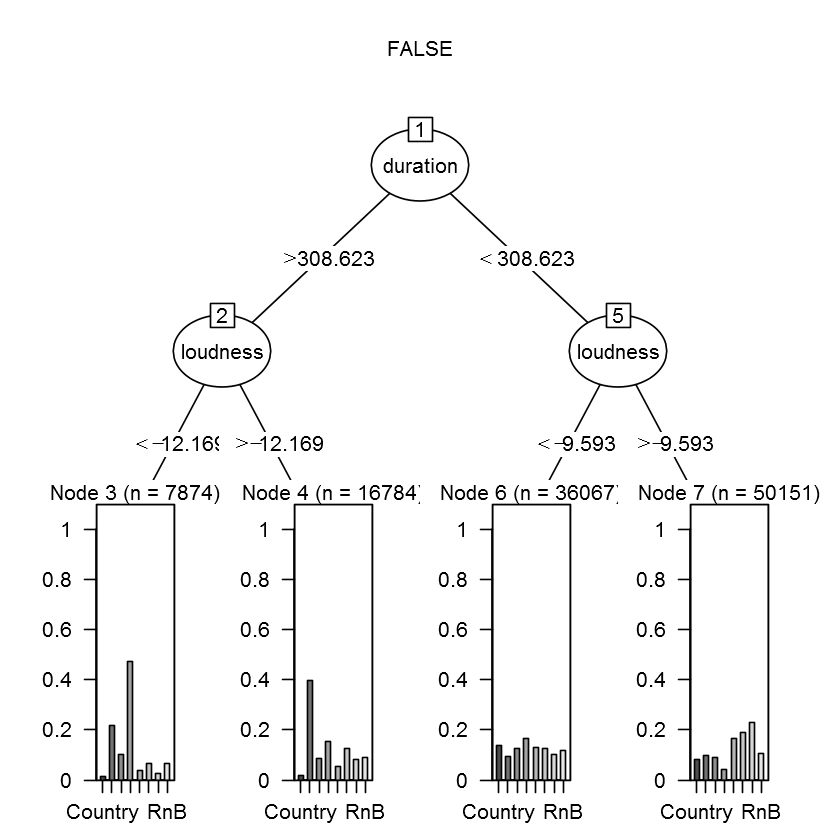

In [65]:
plot(as.party(bal_tree), list(id=F), las=2)

In [66]:
tt = table(train_tree$genre, predict(bal_tree, newdata=train_tree, type='class'))
print(1 - sum(diag(tt))/sum(tt))
tt = table(test_tree$genre, predict(bal_tree, newdata=test_tree, type='class'))
print(1 - sum(diag(tt))/sum(tt))

[1] 0.7491883
[1] 0.74908


In [67]:
printcp(bal_tree)


Classification tree:
rpart(formula = genre ~ ., data = train_tree)

Variables actually used in tree construction:
[1] duration loudness

Root node error: 94094/110876 = 0.84864

n= 110876 

        CP nsplit rel error  xerror      xstd
1 0.071535      0   1.00000 1.00116 0.0012649
2 0.024592      1   0.92847 0.92847 0.0014466
3 0.021064      2   0.90387 0.90435 0.0014950
4 0.010000      3   0.88281 0.88371 0.0015324


## Random Forest
## On Frequent dataset

In [43]:
library('randomForest')

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


# Random Forest Full Model

-0.1475132 0.05 
0.1074566 0.05 
0.02568798 0.05 


,mtry,OOBError
1.OOB,1.0000000,0.6585916
2.OOB,2.0000000,0.5739294
4.OOB,4.0000000,0.5122569
7.OOB,7.0000000,0.4990981


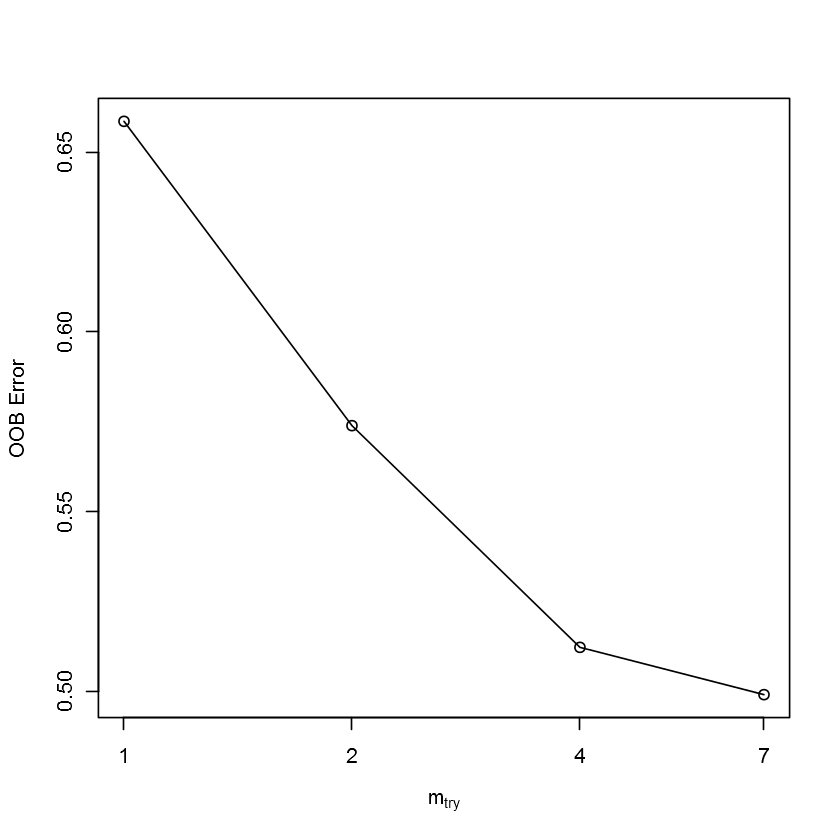

In [86]:
tuneRF(train_tree[,-1], train_tree$genre, 
       ntreeTry=50, stepFactor=2, improve=0.05, trace=FALSE, plot=FALSE, doBest=FALSE)

In [87]:
rforest = randomForest(genre ~ . ,data=train_tree, ntree=500, mtry=4,importance=T)

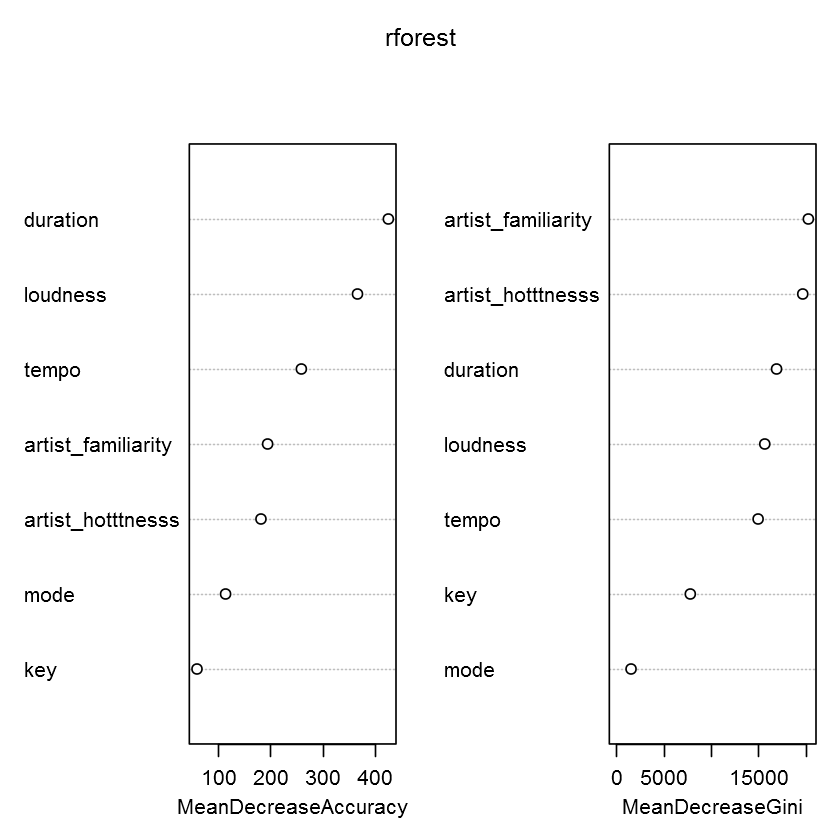

In [88]:
varImpPlot(rforest)

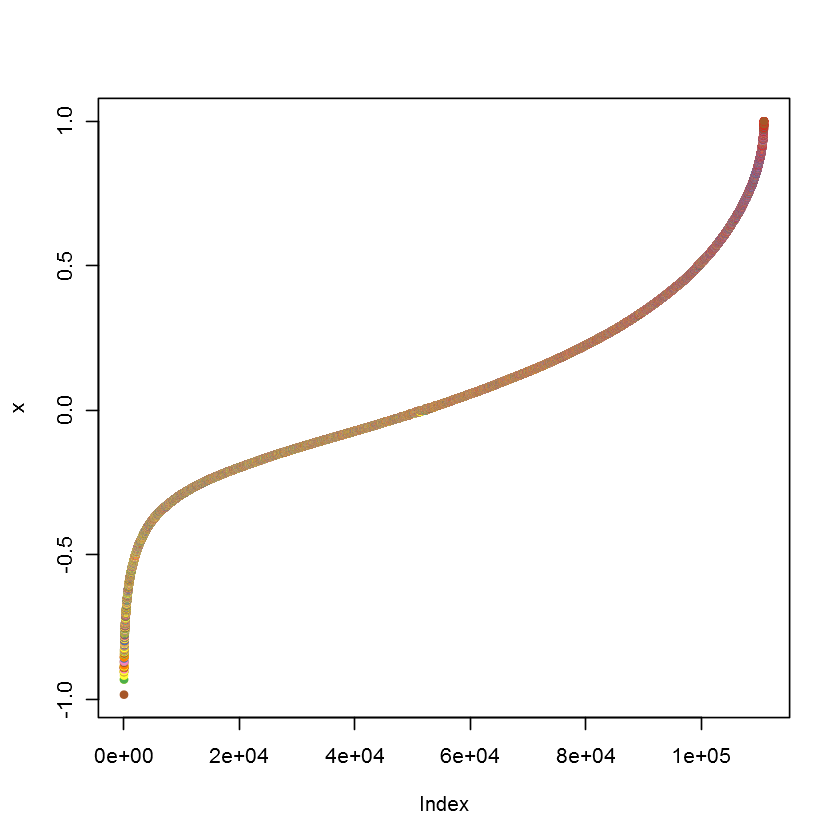

In [89]:
plot(margin(rforest, observed=train_tree$genre))

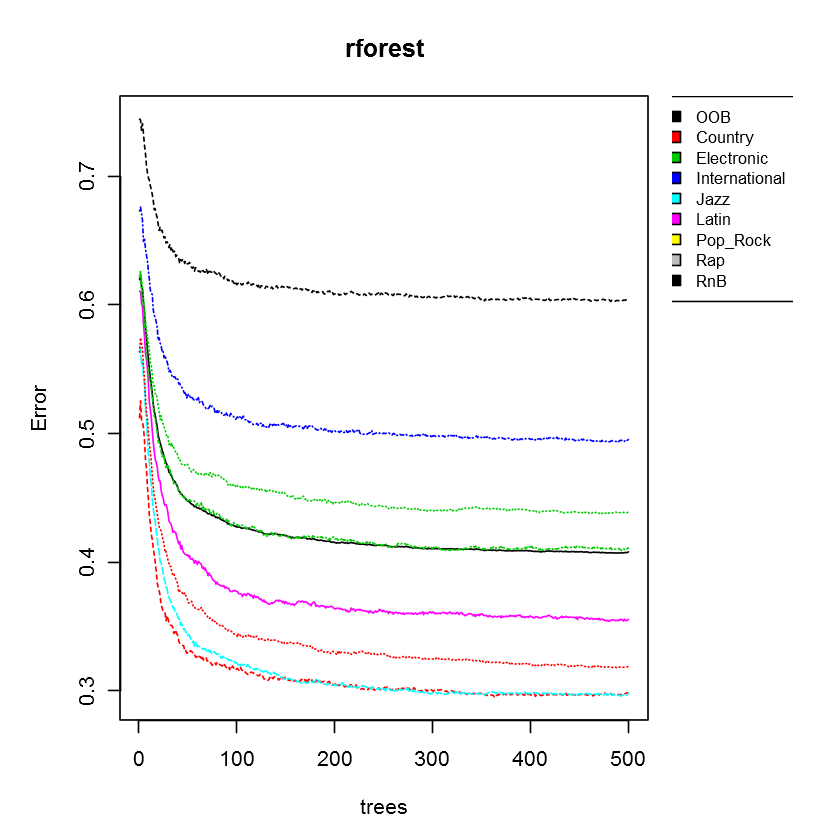

In [107]:
layout(matrix(c(1,2),nrow=1),
       width=c(4,1)) 
par(mar=c(5,5,4,1)) #No margin on the right side
plot(rforest)
par(mar=c(5,0,4,2)) #No margin on the left side
plot(c(0,1),type="n", axes=F, xlab="", ylab="")
legend("top", colnames(rforest$err.rate),col=1:8,cex=0.8,fill=1:8)

In [91]:
# reduced model
pred <- predict(rforest, newdata = test_tree, type='class')
tt = table(pred, test_tree$genre)
print(paste('Misclassificaiton Rate = ',1 - sum(diag(tt))/sum(tt)))

[1] "Misclassificaiton Rate =  0.456995454217476"


# Random Forest Full Model 1000 trees

In [117]:
rforest = randomForest(genre ~ ., data=train_tree, ntree=1000, mtry=4,importance=T)

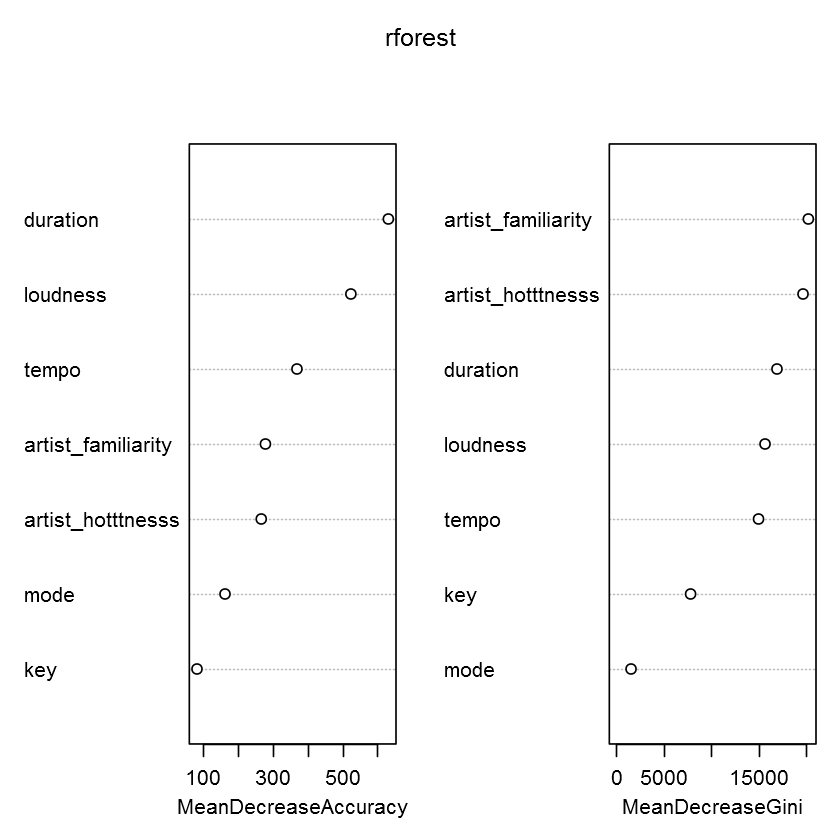

In [118]:
varImpPlot(rforest)

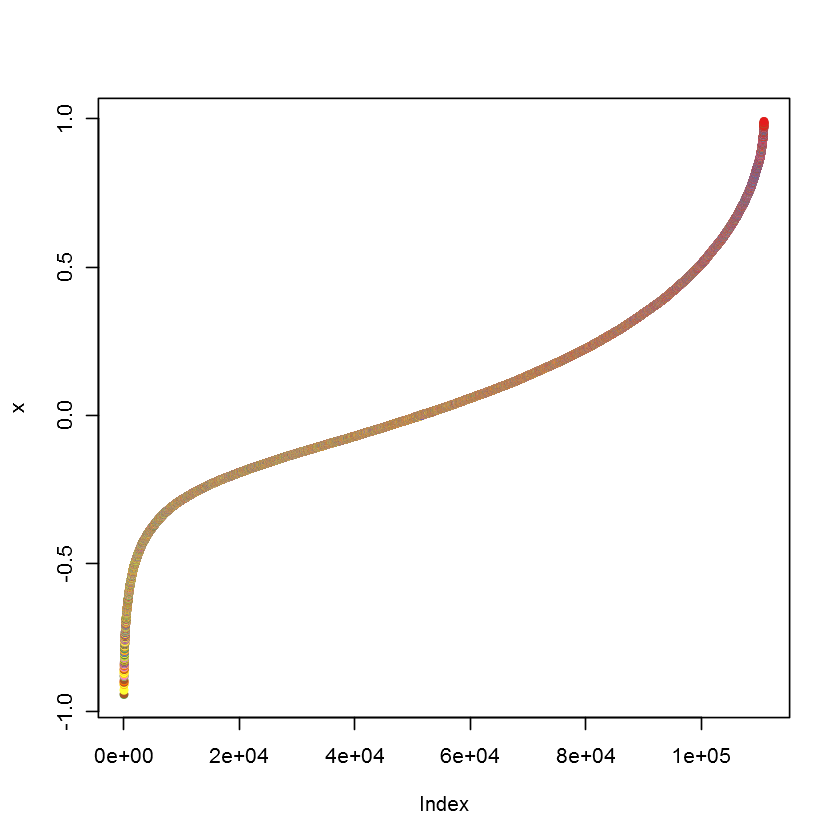

In [119]:
plot(margin(rforest, observed=train_tree$genre))

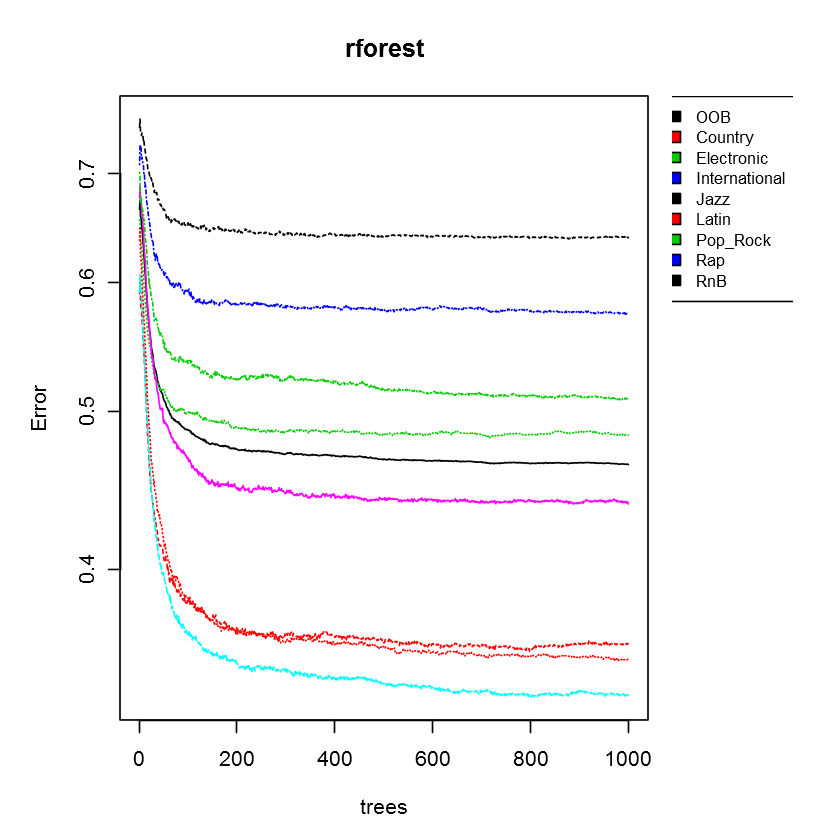

In [120]:
layout(matrix(c(1,2),nrow=1),
       width=c(4,1)) 
par(mar=c(5,5,4,1)) #No margin on the right side
plot(rforest, log="y")
par(mar=c(5,0,4,2)) #No margin on the left side
plot(c(0,1),type="n", axes=F, xlab="", ylab="")
legend("top", colnames(rforest$err.rate),col=1:4,cex=0.8,fill=1:4)

In [121]:
pred <- predict(rforest, newdata = test_tree, type='class')
tt = table(pred, test_tree$genre)
print(paste('Misclassificaiton Rate = ',1 - sum(diag(tt))/sum(tt)))

[1] "Misclassificaiton Rate =  0.460278519373692"


# Random Forest Reduced Model

In [99]:
tuneRF(train_tree[,c('duration','loudness','tempo','artist_hotttnesss','artist_familiarity')], 
       train_tree$genre, 
       ntreeTry=50, stepFactor=2, improve=0.05, trace=FALSE, plot=FALSE, doBest=FALSE)

-0.1036125 0.05 
0.08155727 0.05 
0.01498393 0.05 


,mtry,OOBError
1.OOB,1.0000000,0.5496861
2.OOB,2.0000000,0.4980789
4.OOB,4.000000,0.457457
5.OOB,5.0000000,0.4506025


In [100]:
#Reduced Model
rforest = randomForest(genre ~ duration+loudness+tempo+artist_hotttnesss+artist_familiarity,
                       data=train_tree, ntree=500, mtry=4,importance=T)

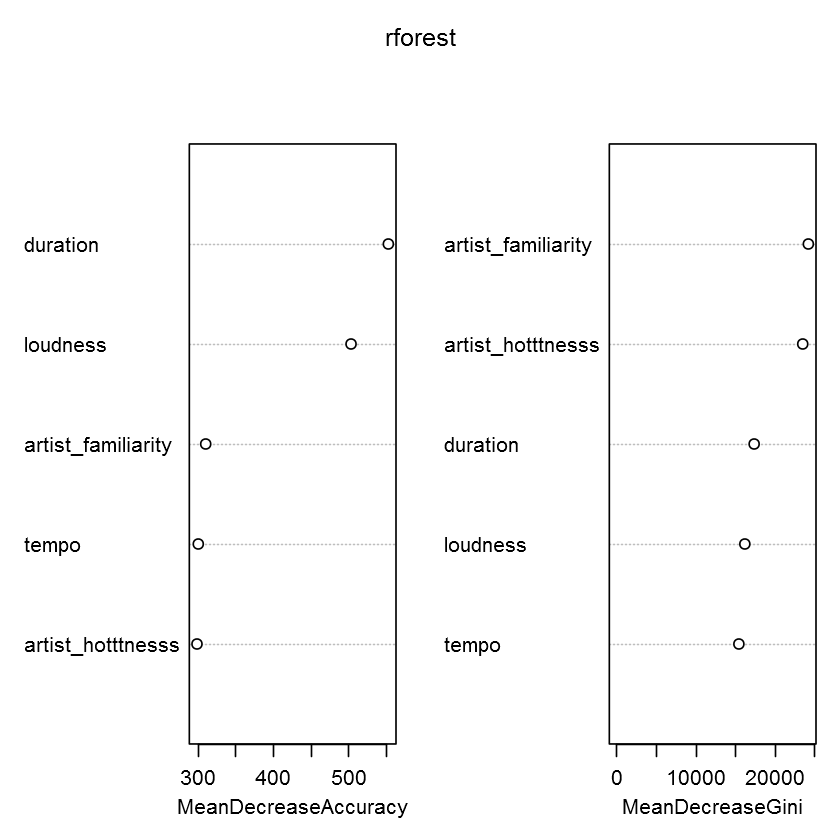

In [101]:
# reduced model
varImpPlot(rforest)

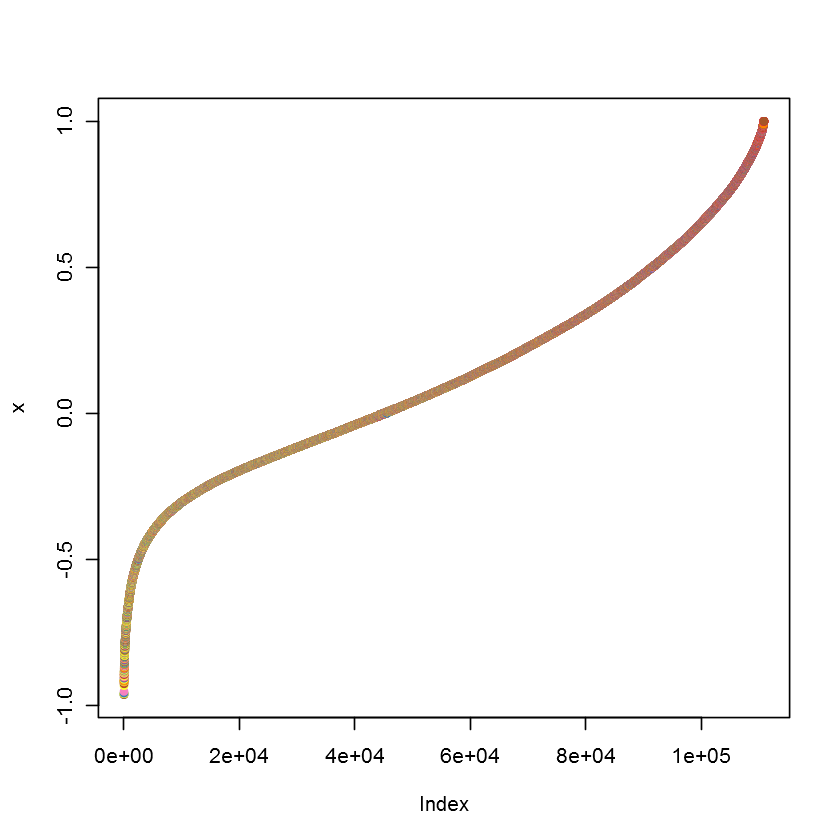

In [103]:
# reduced model
plot(margin(rforest, observed=train_tree$genre))

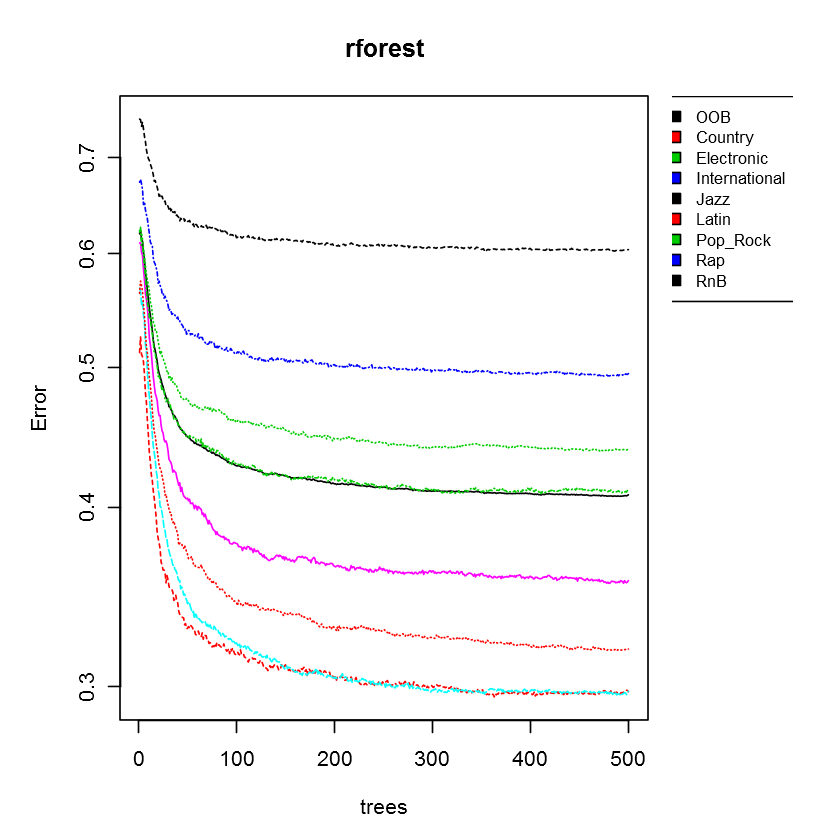

In [104]:
# reduced model
layout(matrix(c(1,2),nrow=1),
       width=c(4,1)) 
par(mar=c(5,5,4,1)) #No margin on the right side
plot(rforest, log="y")
par(mar=c(5,0,4,2)) #No margin on the left side
plot(c(0,1),type="n", axes=F, xlab="", ylab="")
legend("top", colnames(rforest$err.rate),col=1:4,cex=0.8,fill=1:4)

In [105]:
# reduced model
pred <- predict(rforest, newdata = test_tree, type='class')
tt = table(pred, test_tree$genre)
print(paste('Misclassificaiton Rate = ',1 - sum(diag(tt))/sum(tt)))

[1] "Misclassificaiton Rate =  0.398369290713616"


# Reduced Model 1000 trees Random Forest

In [109]:
rm(rforest, pred)

In [112]:
rforest = randomForest(genre ~ duration+loudness+tempo+artist_hotttnesss+artist_familiarity,
                       data=train_tree, ntree=1000, mtry=4,importance=T)

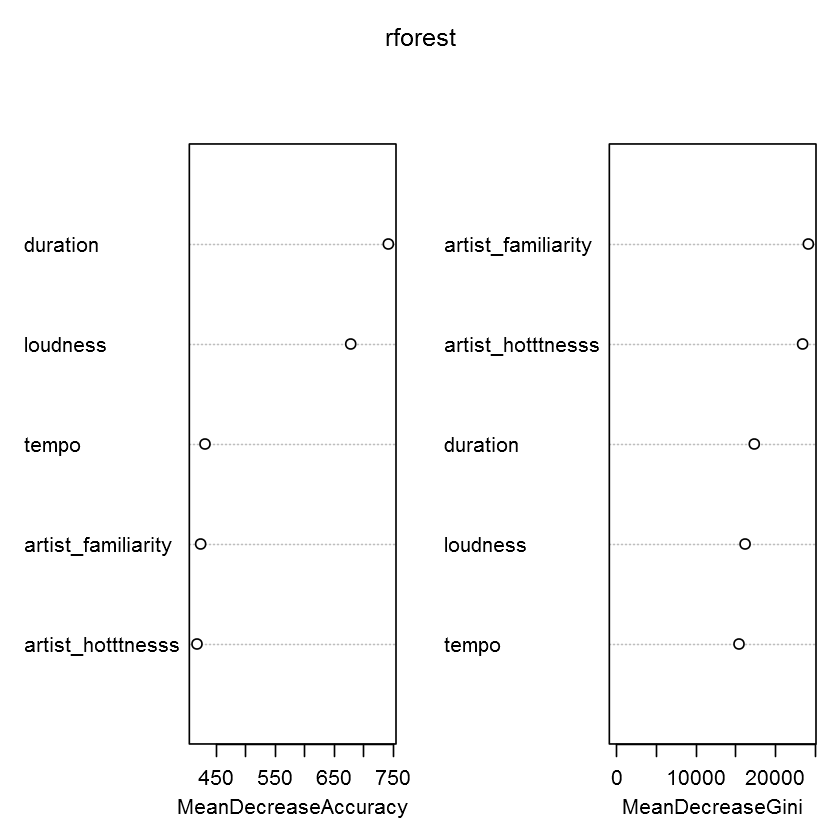

In [113]:
varImpPlot(rforest)

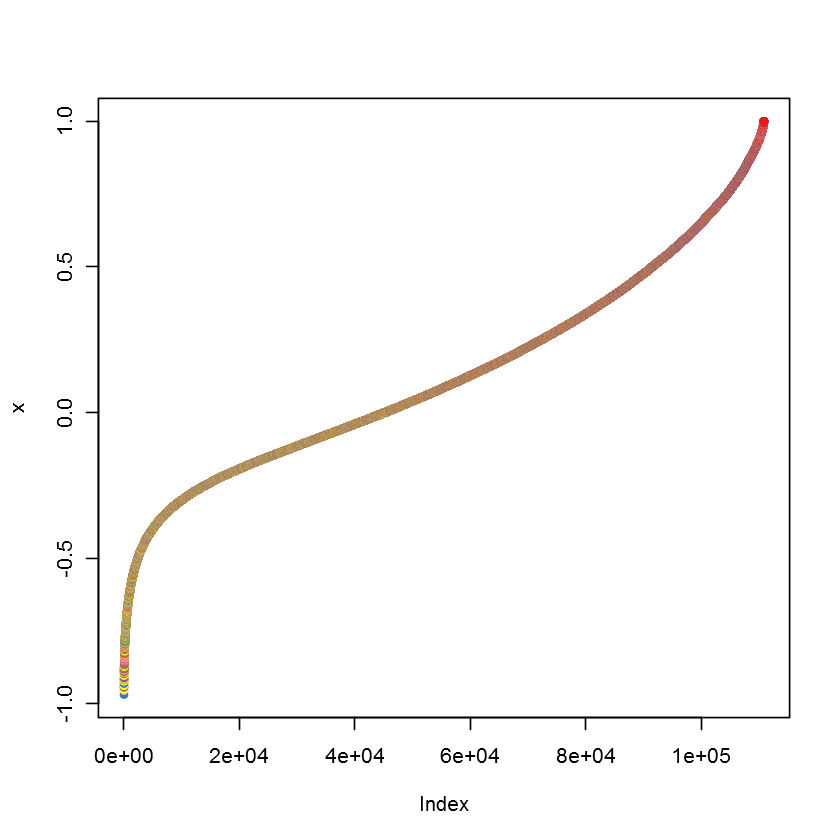

In [114]:
plot(margin(rforest, observed=train_tree$genre))

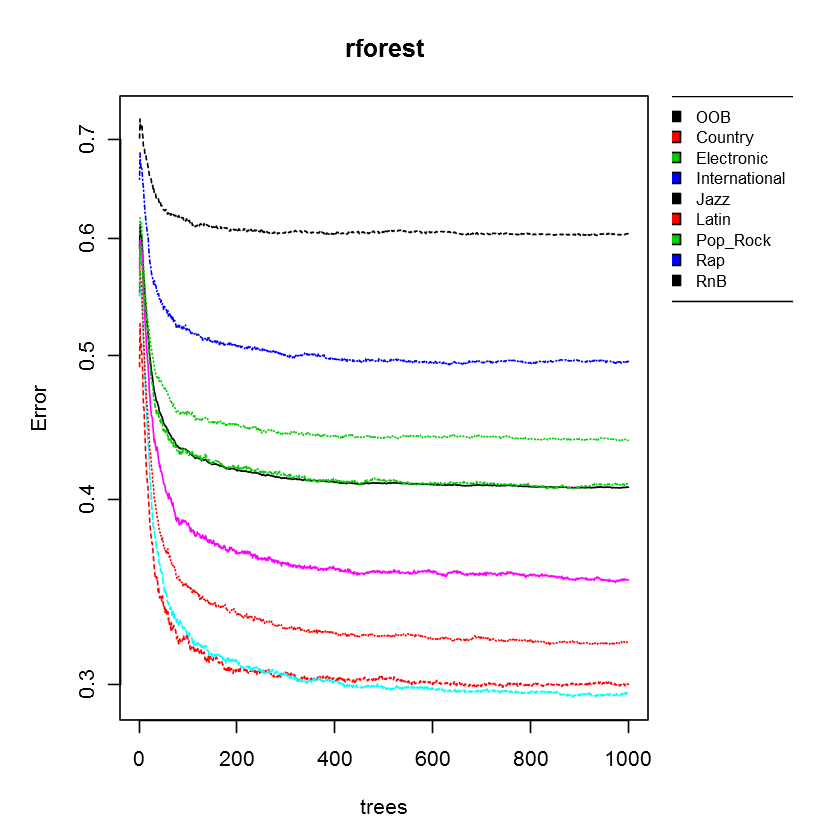

In [115]:
layout(matrix(c(1,2),nrow=1),
       width=c(4,1)) 
par(mar=c(5,5,4,1)) #No margin on the right side
plot(rforest, log="y")
par(mar=c(5,0,4,2)) #No margin on the left side
plot(c(0,1),type="n", axes=F, xlab="", ylab="")
legend("top", colnames(rforest$err.rate),col=1:4,cex=0.8,fill=1:4)

In [116]:
pred <- predict(rforest, newdata = test_tree, type='class')
tt = table(pred, test_tree$genre)
print(paste('Misclassificaiton Rate = ',1 - sum(diag(tt))/sum(tt)))

[1] "Misclassificaiton Rate =  0.400570026697453"
